# Differentiation

In this chapter we will apply some of the results given in the last chapter, to compute numeric derivative estimates for given functions (or data).

## Application of the first order rules

The following definition can be used to numerically differentiate a given function `fun` at a set of points `x` using either forward or central differences. Check that you understand how this function is constructed.

In [1]:
import numpy as np
def fdiff(x, fun, type):

    h=x[1]-x[0]
    if type =='forward':
        xx = np.append(x,x[-1]+h)
        yy = fun(xx)
        fd = (yy[1:]-yy[:-1])/h
    elif type == 'central':
        xx = np.insert(x,[0,len(x)],[x[0]-h, x[-1]+h])
        yy = fun(xx)
        fd = (yy[2:]-yy[:-2])/(2*h)

    return fd

Below, the definition is utilised in applying the central difference approximation to the problem given in {numref}`sinxplusx`.

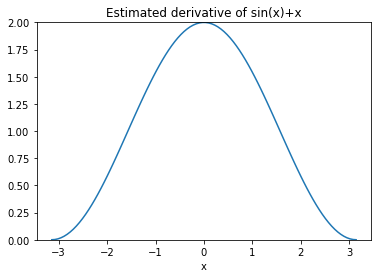

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-np.pi,np.pi,100)
y = lambda x: np.sin(x) + x

d = fdiff(x,y,'central')

plt.plot(x, d)
plt.xlabel('x')
plt.title('Estimated derivative of sin(x)+x')
plt.ylim(0,2)
plt.show()

## Demonstrating the truncation error
To illustrate the accuracy of the finite difference formulae, we can compute the maximum error in the approximation for a range of step sizes and plot the result. Since the resulting errors $E$ are proportional to $h^n$, a plot of $\ln(E)$ against $\ln(h)$ should show a linear relationship. The gradient of the line gives the estimated order of the truncation error, $n$. We find (as expected) that the formula based on forward differences has a first order error relationship and the formula based on central differences has a quadratic order error relationship.

forward estimated n= 0.99906



central estimated n= 1.99830



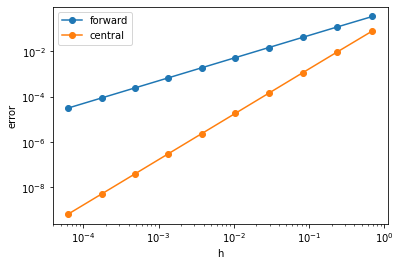

In [3]:
import matplotlib.pyplot as plt

num_h=10
hvals = 2*np.pi/(np.logspace(1,5,num_h)-1)

fig, ax = plt.subplots()

for _,method in enumerate(['forward', 'central']):
    Evals = np.zeros(hvals.shape)
    fun = lambda a: list(map(lambda x: np.sin(x), a)) + a
    for i in range(num_h):
        # Set up grid
        h=hvals[i]
        x= np.arange(-np.pi,np.pi,h)

        fd = fdiff(x,fun,method)
        dydx = np.asarray(list(map(lambda b: np.cos(b), x))) + 1

        err = abs(dydx-fd)
        Evals[i] = max(abs(err))

    ax.loglog(hvals,Evals,'-o', label=method)

    # Fitting degree 1 polynomial
    p = np.polyfit(np.log(hvals), np.log(Evals), 1)
    # Truncation error
    print(method, 'estimated n= {:.5f}\n'.format(p[0]))

ax.set_xlabel('h')
ax.set_ylabel('error')
ax.legend()
plt.show()

### Discussion
Euler's formula is rarely used in problems of real practical importance, as it often requires impractically small integration steps to achieve the required accuracy goal. However, it does appear as a sub-step in some other important formulas that we will encounter in the section on multistep methods.

The central difference formulas are of particular importance. They are very heavily used in numeric methods because they achieve a good balance between simplicity, stability and accuracy.

### Why is the central difference approximation better?

Notice that the error in the central difference formula is predicted to be $\mathcal{O}(h^2)$ whilst the error in the forward and central difference formulae are predicted to be $\mathcal{O}(h)$. We can understand the result via a graphical argument.

If we replace $h$ with $h/2$ in the central difference expression {eq}`central1a` then we obtain

```{math}
:label: central1b
y^{\prime}_{k} = \frac{y_{k+1/2}-y_{k-1/2}}{h}+\frac{h^2}{4}\left[-\frac{2}{3}y^{\prime\prime}_k+\dots\right] \qquad \text{where }  y_{k\pm1/2}=y(x_k\pm h/2)
```

This result requires the function values at the midpoint of each pair of $x$ grid values. It is convenient to relabel the index, so that the subscript on the right had side of the formula matches the numbering of the gridpoints, giving

```{math}
:label: central1c
y_{k+1/2}^{\prime}\simeq\frac{y_{k+1}-y_{k}}{h}
.
```

This result is identical to the forward derivative estimate, but it should be interpreted as the derivative of the function at the mid-point of each interval, rather than at the left-hand point.

The graphic below provides an indication of why this usually gives a better estimate for the first derivative. The sketch indicates that the slope of the secant line between adjacent coordinates gives a better approximation to the gradient at the midpoint of the interval than at either of the endpoints.

``` {image} images/midpoint.png
:alt: midpoint rule
:scale: 100%
:align: center
```

## Application of the second order rules

```{exercise}
Compute the second derivative of the following function for on a grid of 100 points and plot the error

\begin{equation}\sin(x)+x, \quad x\in[-\pi,\pi],\end{equation}

(a) using the forward difference formula

(b) using the central difference formula

You will need to extend the function estimate at *two* exterior points to obtain a result for the derivative at each point in the interval.
```

Step size h= 0.06347


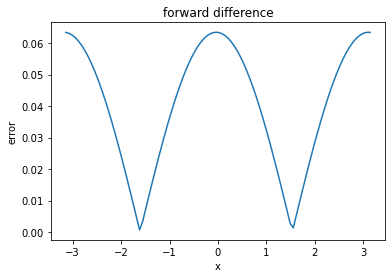

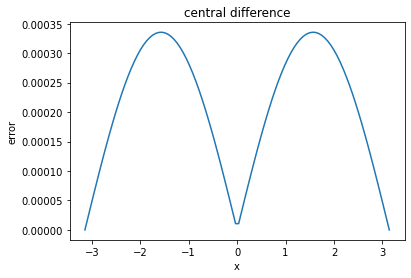

In [4]:
a = -np.pi
b = np.pi
x = np.linspace(a,b,100)
h = x[1]-x[0]
print('Step size h= {:.5f}'.format(h))

# Forward difference rule
xx = np.append(x, (b+h, b+2*h))
y = np.sin(xx) + xx
d2ydx2_fwd = (y[:-2]-2*y[1:-1]+y[2:])/h**2

exact = -np.sin(x)

plt.plot(x, np.abs(d2ydx2_fwd-exact))
plt.xlabel("x")
plt.ylabel("error")
plt.title("forward difference")
plt.show()

# Central difference rule
xx = np.insert(x, [0,len(x)], [a-h,b+h])
y = np.sin(xx) + xx
d2ydx2_ctr = (y[:-2]-2*y[1:-1]+y[2:])/h**2

plt.plot(x, np.abs(d2ydx2_ctr-exact))
plt.xlabel("x")
plt.ylabel("error")
plt.title("central difference")
plt.show()